# Introduction to neural network classification with tensorflow

A few types of classification
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Right now our data is a bit hard to understand right now so lets visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "Label":y})
circles

X0        X1  Label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

In [ ]:
circles["Label"].value_counts()

1    500
0    500
Name: Label, dtype: int64

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu);

### Input and Output shapes

In [ ]:
# Check the features and labels shapes

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with

len(X), len(y)

(1000, 1000)

In [ ]:
# Viewing an example for feature and labels
X[9], y[9]

(array([-0.1214858 ,  1.02150905]), 0)

In [ ]:
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

### Steps in modelling

The steps in modelling with tensorflow are:
1. Create or import a model
2. Compile a model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate ...
 

In [ ]:
import tensorflow as tf
#Importing tensorflow

tf.__version__

'2.4.1'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)


# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])


# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
# Let's try and improve our model by training it for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since our model isnt performing well (with an accuracy of 0.5) so let's increase the no. of layers

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1799 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7253 - accuracy: 0.5082
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.5047
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.4901
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4869
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5184
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4955
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5077
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 971us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

### Improving our model

1. Create the model - Increase the number of layers of increase the number oof hidden units in each layer or change the activation functions
2. Compiling the model - We might choose a different optimizer eg. Adam instead of SGD
3. Fit the model - Increase the number of epochs


<br>

Some hyperparameters that cpuld be changed are:
1. Adding layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the learning rate
5. Fit on more data
6. Fit for longer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (with 3 layers)
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

model_3.fit(X, y, verbose=0, epochs=100)

In [ ]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visualize our model's predictions let's create a function `plot_decision_boundary()`

* Take the traned model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)


In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """

    # Defining the axis boundary of the plot and create a meshgrid

    x_min, m_max = X[:,0].min() -0.1, X[:,0].max() +0.1
    y_min, y_max = X[:,1].min() -0.1, X[:,1].max() +0.1

    xx, yy = np.meshgrid(np.linspace(x_min, m_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to make predictions on it)

    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2 D array
    

    # Make predictions

    y_pred = model.predict(x_in)


    #Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


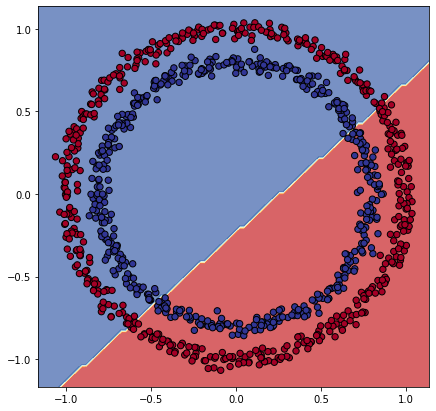

In [ ]:
# Check out the predictions aour model is making

plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

Let's build a regression model to fit this data, because the classification showed a linear bifurcation of values

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100,1100, 5)  ## X = Y+100

# Split data into training and testing data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# model_3.fit(X_reg_train, y_reg_train, epochs = 100)  

this willl give error
That's because the model was comiled to have a loss function of Binarycrossentropy
Which is for classification (Binary)

In [ ]:
# Building the model now from scratch (but similar)

# Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
    ]
)

# 2. Compile the model

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

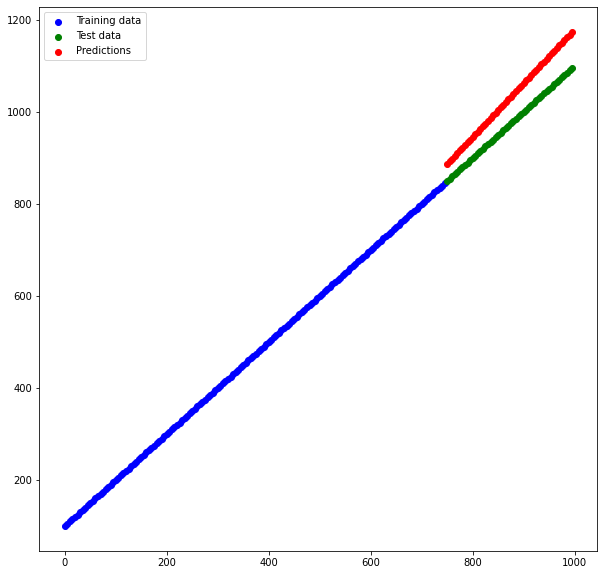

In [ ]:
# make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10,10))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

The one thing we can understand from the classification and regression model here is that the model is definately something. That is obvious from the predictions from the regression model(model_4)
But the classification model hasn't predicted correctly, in fact the classification of the datapoints were done linearly on a straight line. (as seen from the plot)

So what we don't have right now is `non-linearity` of the model. We haven't introduced that to the model yet

We're now recreating some examples from the tensorflow playground

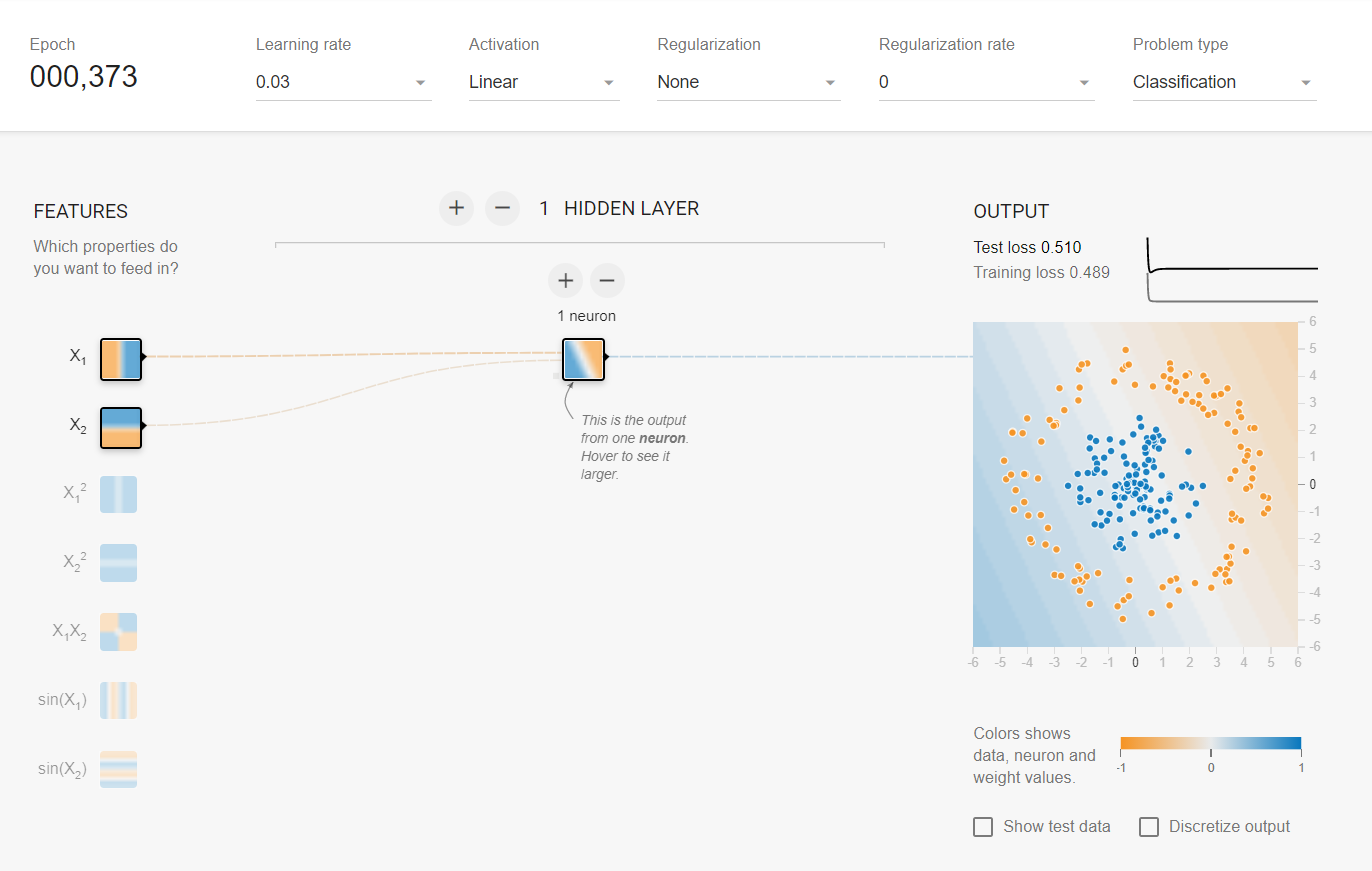

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ]
)

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

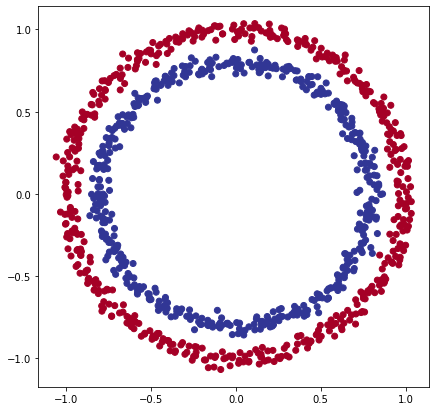

In [ ]:
# Check out our data
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


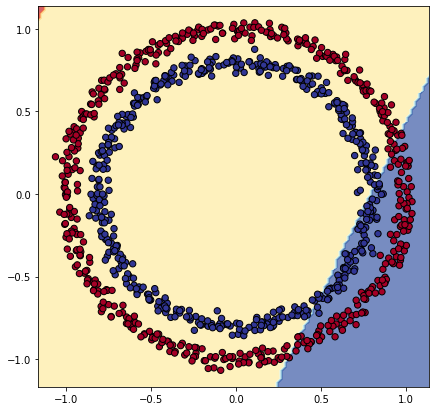

In [ ]:
# Check the decision boundary for ot model_4

plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

On Own

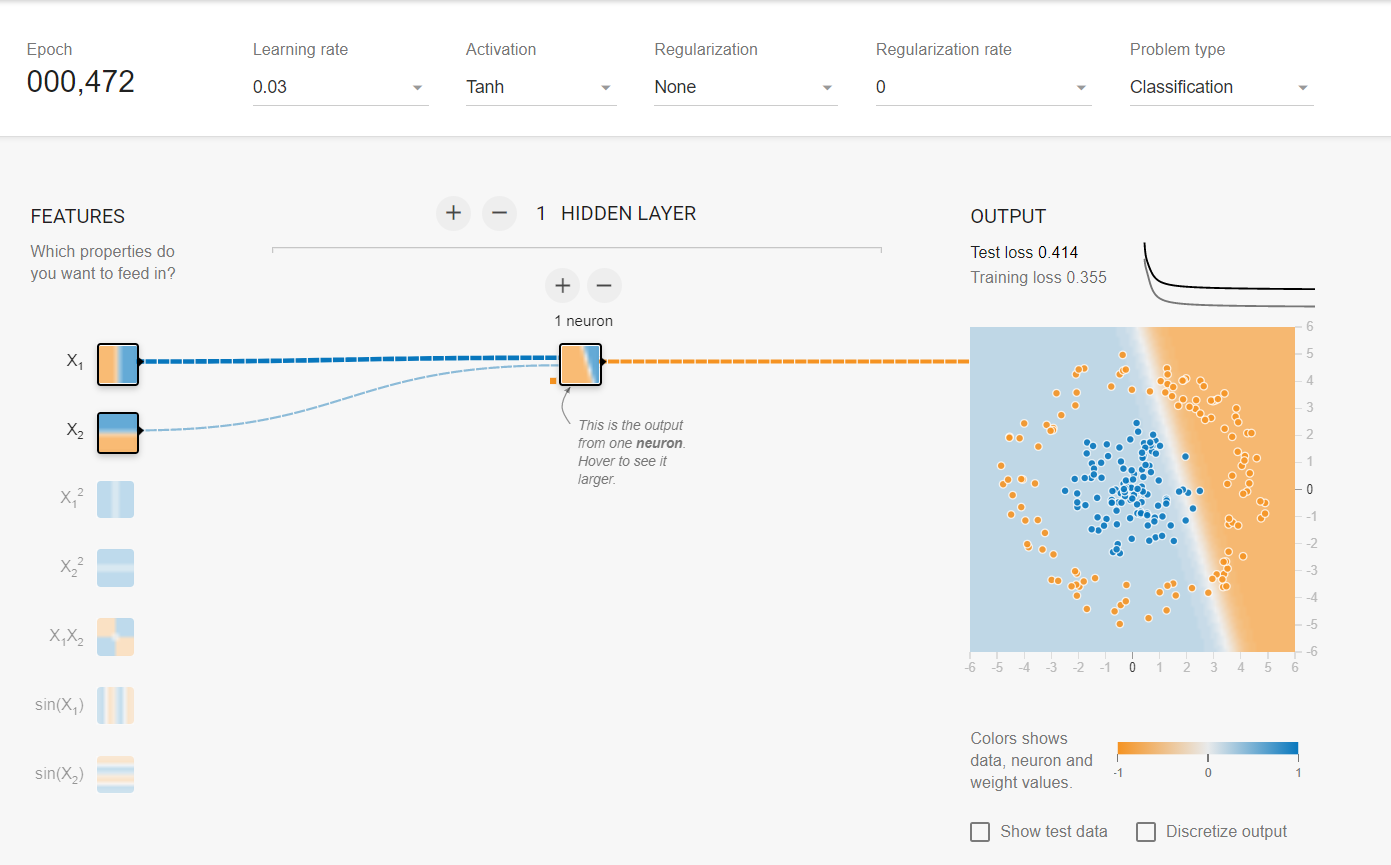

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown1 = onown1.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6209 - accuracy: 0.4828
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3064 - accuracy: 0.4799
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5247 - accuracy: 0.4673
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0579 - accuracy: 0.4689
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2364 - accuracy: 0.4423
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8179 - accuracy: 0.4816
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0326 - accuracy: 0.4451
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6288 - accuracy: 0.4376
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8620 - accuracy: 0.4019
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5572 - accuracy: 0.4555
Epoch 11/

doing binary classification


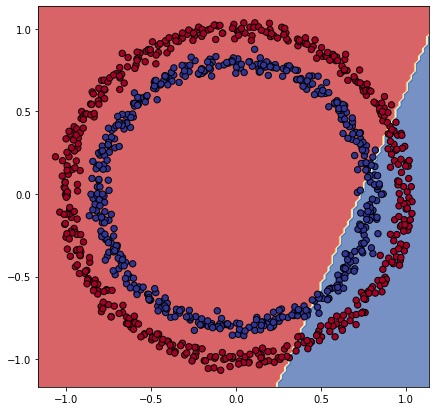

In [ ]:
plot_decision_boundary(onown1, X, y)

image.png

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown2 = onown2.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.7021 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1953 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1124 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5415 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3139 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4958 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2938 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9867 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0028 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9093 - accuracy: 0.5161
Epoch 11/

In [ ]:
plot_decision_boundary(onown2, X, y)

doing binary classification


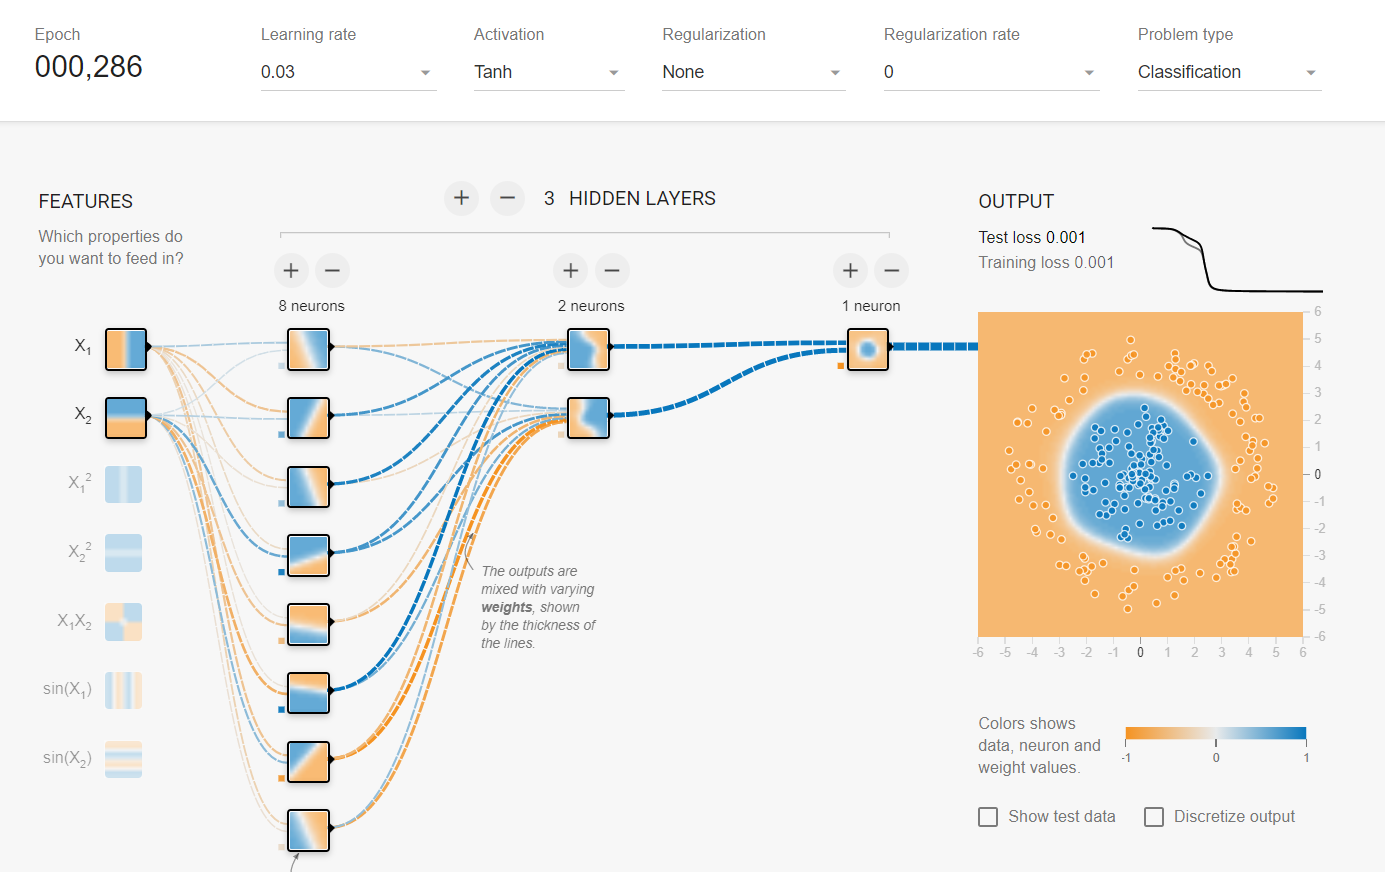

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
onown3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
historyonown3 = onown3.fit(X ,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.0342 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1281 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9689 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8944 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8581 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7673 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7646 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.5161
Epoch 11/

doing binary classification


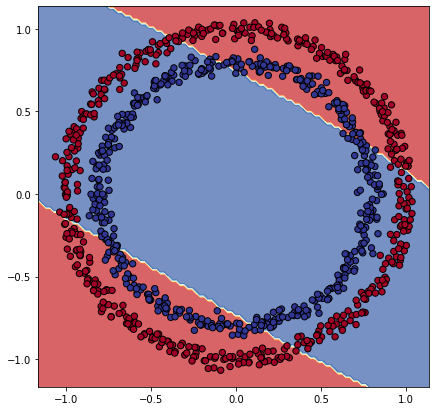

In [ ]:
plot_decision_boundary(onown3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ]
)

# Compile the model
onown4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown4 = onown4.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 1.1320 - accuracy: 0.4489
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.1611
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7578 - accuracy: 0.4513
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.2809
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.3403
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.4422
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5325
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6911
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7987
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.9770
Epoch 11/

doing binary classification


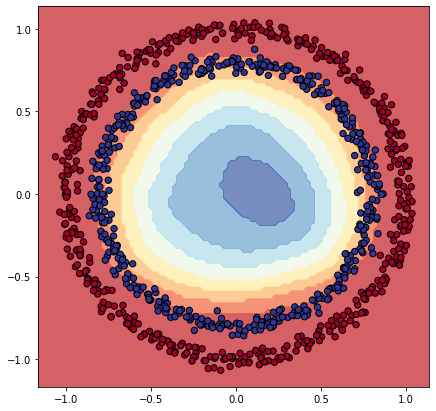

In [ ]:
plot_decision_boundary(onown4, X, y)

In [ ]:
onown4.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_166 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_167 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_168 (Dense)            (None, 2)                 22        
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 3         
Total params: 5,885
Trainable params: 5,885
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.7177 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4839
Epoch 11/

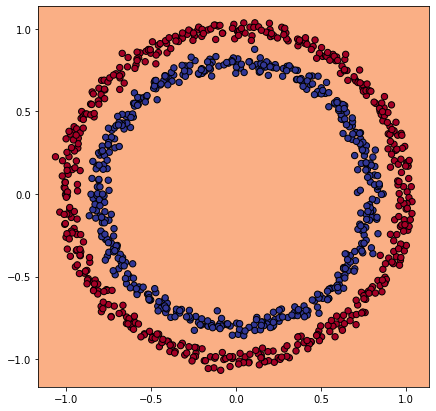

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown5 = onown5.fit(X, y, epochs=200)

plot_decision_boundary(onown5, X, y)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 3.8826 - accuracy: 0.4605
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1591 - accuracy: 0.4755
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4499
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4951
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4826
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5287
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5163
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5416
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5154
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5433
Epoch 11/

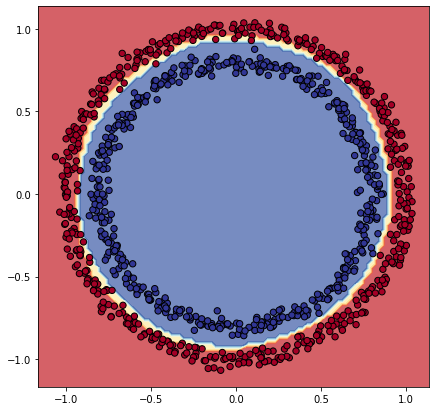

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown6 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)
    ]
)

# Compile the model
onown6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown6 = onown6.fit(X, y, epochs=200)

plot_decision_boundary(onown6, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

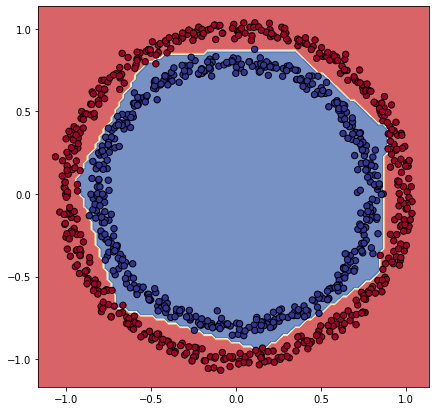

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown7 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown7 = onown7.fit(X, y, epochs=200)

plot_decision_boundary(onown7, X, y)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.4839
Epoch 11/

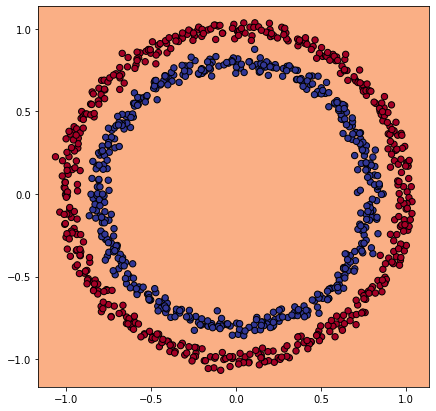

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown8 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown8 = onown8.fit(X, y, epochs=200)

plot_decision_boundary(onown8, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown9 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown9 = onown9.fit(X, y, epochs=200)

plot_decision_boundary(onown9, X, y)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.4839
Epoch 11/

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5170
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5120
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5069
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5036
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5173
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4682
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.4942
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5002
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5204
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.4839
Epoch 11/

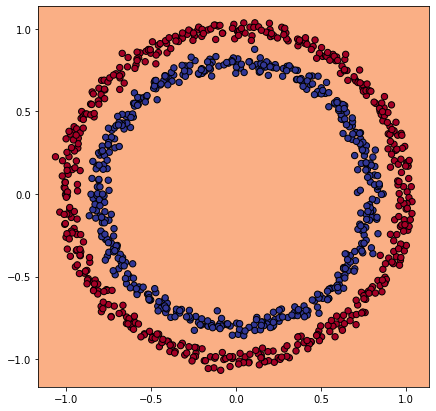

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown10 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.softmax)
    ]
)

# Compile the model
onown10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown10 = onown10.fit(X, y, epochs=200)

plot_decision_boundary(onown10, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
onown11 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.tanh),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

# Compile the model
onown11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
historyonown11 = onown11.fit(X, y, epochs=100)

plot_decision_boundary(onown11, X, y)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5088
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5109
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5395
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5311
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4971
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5332
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5719
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5784
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6024
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5510
Epoch 11/

On own end

**Note:** The combination of linear (straight lines) and non-linear (non-straight) lines or functions is the key to the fundamentals of neural networks

In [ ]:
# Create a toy tensor (vey similar to the data we pass into iur model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

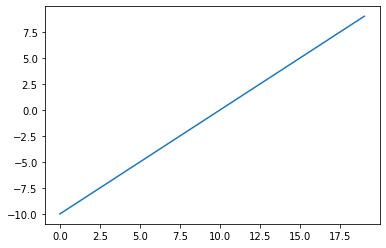

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's try by replicating sigmoid - 1 / (1+ exp(-x))

def sigmoid(x):
    return 1 / (1+tf.exp(-x))

# Use sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

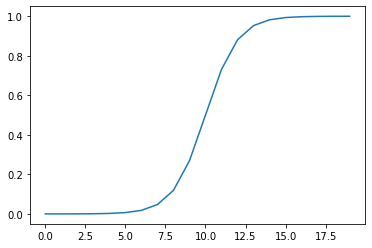

In [ ]:
# Plot our toy tensor transormed by sigmoid 
plt.plot(sigmoid(A));

In [ ]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399931e-05, 1.2338161e-04, 3.3542514e-04, 9.1105700e-04,
       2.4726391e-03, 6.6929162e-03, 1.7986238e-02, 4.7425866e-02,
       1.1920291e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966455e-01, 9.9987662e-01],
      dtype=float32)>

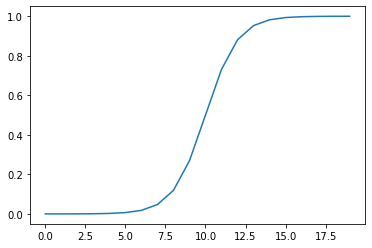

In [ ]:
plt.plot(tf.keras.activations.sigmoid(A))

In [ ]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

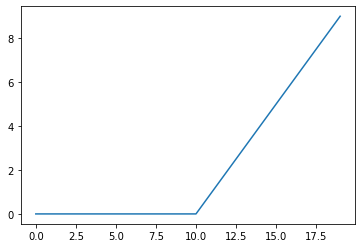

In [ ]:
plt.plot(relu(A));

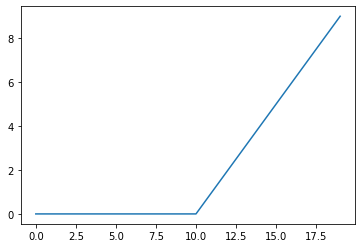

In [ ]:
plt.plot(tf.keras.activations.relu(A));

In [ ]:
# Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

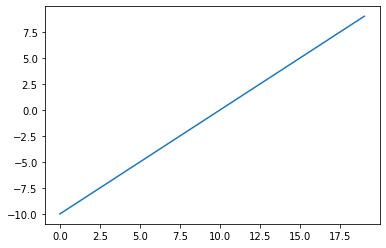

In [ ]:
plt.plot(tf.keras.activations.linear(A))

### Evaluating and improving our classification


Till now we have been trainig and testing on the same dataset (theerby committing a sin)
Hence let's create a training and testing set

In [ ]:
len(X)

1000

In [ ]:
# Slpit into train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X.shape, y.shape

((800, 2), (800,), (1000, 2), (1000,))

In [ ]:
# Let's recreate a model to fit on training data and evaluate on test data

# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])


# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5343
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5528
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5707
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.5852
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.5739
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.6207
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6297
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.7071
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7338
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.7815
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on test data set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

doing binary classification
doing binary classification


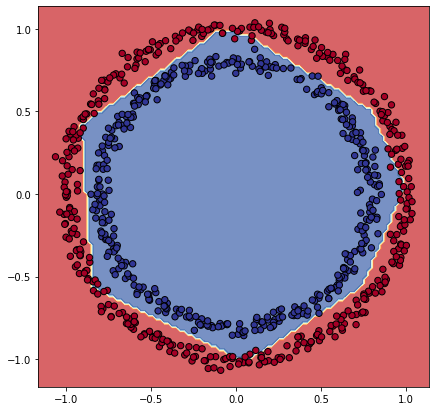

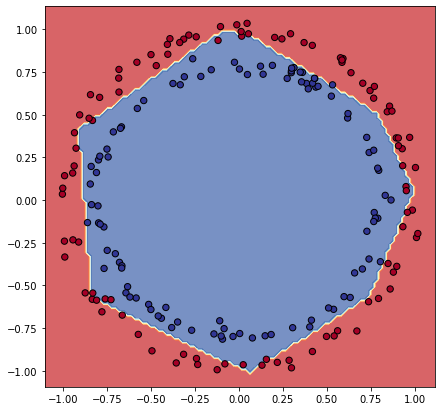

In [ ]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_8, X_train, y_train)

plot_decision_boundary(model_8, X_test, y_test)

### Plot the loss (or training) curves

In [ ]:
history_8.history

{'accuracy': [0.5637500286102295,
  0.5649999976158142,
  0.5762500166893005,
  0.5724999904632568,
  0.5712500214576721,
  0.59375,
  0.6274999976158142,
  0.6962500214576721,
  0.7212499976158142,
  0.7674999833106995,
  0.8025000095367432,
  0.8687499761581421,
  0.8974999785423279,
  0.9162499904632568,
  0.9412500262260437,
  0.9674999713897705,
  0.9587500095367432,
  0.9762499928474426,
  0.9737499952316284,
  0.9750000238418579,
  0.9574999809265137,
  0.9775000214576721,
  0.9775000214576721,
  0.9850000143051147,
  0.9637500047683716],
 'loss': [0.6823503971099854,
  0.6749704480171204,
  0.6679719686508179,
  0.6634892821311951,
  0.6591553688049316,
  0.6474893689155579,
  0.631162166595459,
  0.6093025803565979,
  0.5843716263771057,
  0.5442498922348022,
  0.4914669692516327,
  0.4314340353012085,
  0.3877747058868408,
  0.3405437469482422,
  0.30260783433914185,
  0.262625515460968,
  0.23670434951782227,
  0.21137741208076477,
  0.19696930050849915,
  0.1778701990842819

In [ ]:
# Convert the histroy objevt into dataframe
pd.DataFrame(history_8.history)

loss  accuracy
0   0.682350   0.56375
1   0.674970   0.56500
2   0.667972   0.57625
3   0.663489   0.57250
4   0.659155   0.57125
5   0.647489   0.59375
6   0.631162   0.62750
7   0.609303   0.69625
8   0.584372   0.72125
9   0.544250   0.76750
10  0.491467   0.80250
11  0.431434   0.86875
12  0.387775   0.89750
13  0.340544   0.91625
14  0.302608   0.94125
15  0.262626   0.96750
16  0.236704   0.95875
17  0.211377   0.97625
18  0.196969   0.97375
19  0.177870   0.97500
20  0.191877   0.95750
21  0.155538   0.97750
22  0.147869   0.97750
23  0.129995   0.98500
24  0.144458   0.96375

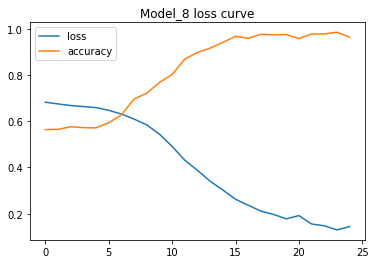

In [ ]:
# Plot the loss Curves

pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curve");

For many problems, the loss function going down means the model is improving 

### Finding the best Learning rate

To find the ideal learning rate ( the learning rate where the loss decresesthe most during training) we're going to use the following steps:
* A learning rate **callback** - it's an extra piece of functionality we can add during training.
* Another model 
* A modified loss curve plots

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit the model (passing the lr_scheduer)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5021
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5130
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4774
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.4613
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4898
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5203
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5148
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.4975
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5101
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.4962
Epoch 11/

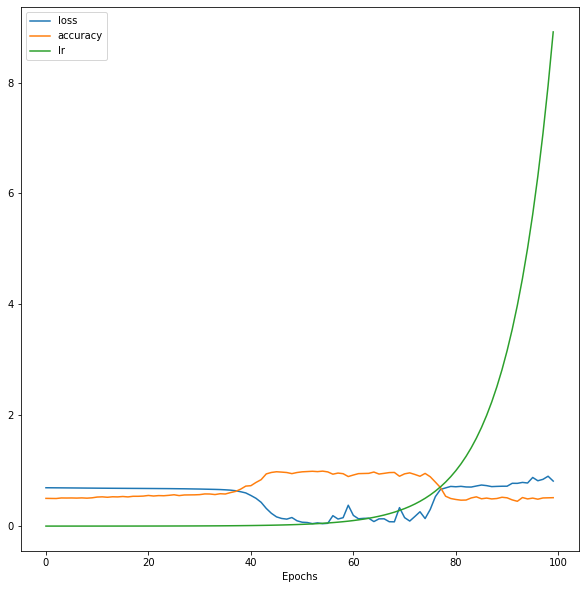

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,10), xlabel="Epochs")

In [ ]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate versus loss')

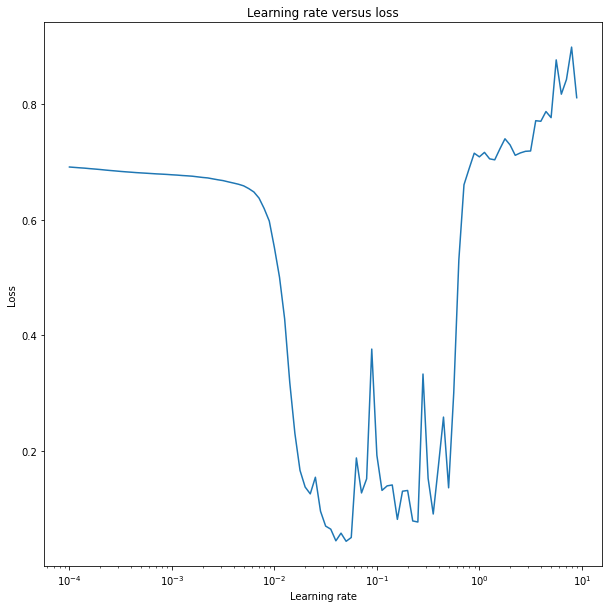

In [ ]:
plt.figure(figsize=(10,10))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate versus loss")

In [ ]:
# Examples of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001, 0.0001)

In [ ]:
# The model seems to be performing best when lr is between 0.01 and o.1...somewhere close to 0.02
# 0.02

In [ ]:
# Let's try using a higher learning rate

# Set random seed
tf.random.set_seed(42)


# Create the model
model_10 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)


# Compile the model with a higher learning rate (lr=0.02)
model_10.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  metrics=["accuracy"])


# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5608
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5503
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5716
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6603
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.6852
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.7168
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8404
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.9186
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9336
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9352
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model_10 on the test data

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504592895507812, 0.9100000262260437]

In [ ]:
# Evaluate the model_8 on the test data

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

The model_10 las a lower loss value as compared to model_8, bacause we increased the learning rate slightly and it also takes lesser epochs to do so (20 in model_10 and 25 in model_8)

doing binary classification
doing binary classification


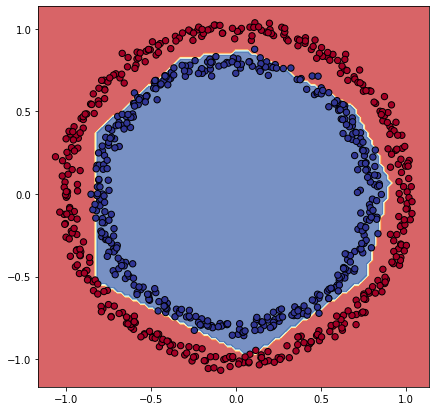

In [ ]:
plot_decision_boundary(model_10, X_train, y_train)
plot_decision_boundary(model_10, X_test, y_test)

### More classification evaluation methods

Apart from visualizations, there are a few other metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from 
scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test data : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9100
Model loss on test data : 0.21504592895507812
Model accuracy on the test set : 91.00%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

#Create confusion matrix
# confusion_matrix(y_test, y_preds) 
# This will give error, as the y_preds will give prediction probability (as decimals) which is a standard output from sigmoid (or softmax) activation function

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.3463719e-01],
       [8.5691512e-03],
       [9.8140264e-01],
       [9.2455745e-04],
       [6.1867726e-01],
       [6.9378287e-01],
       [4.1258335e-04],
       [1.0053813e-03],
       [9.2127585e-01],
       [5.6455433e-03]], dtype=float32)

In [ ]:
# Convert the predictions to binay format and view the firt 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [17, 83]])

How about we prettify our confusion matrix

The following code we're about to write is a remix of scikit-learn's plot_confusion_matrix(). But because that function works with estimator (sklearn model) and we are working with tensorflow we are going to adapt the code for it

In [ ]:
# https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/metrics/_plot/confusion_matrix.py#L168

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

on own

In [ ]:
def plot_confusion_matrix(y_true, y_preds):
    import itertools

    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Greens) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=15)

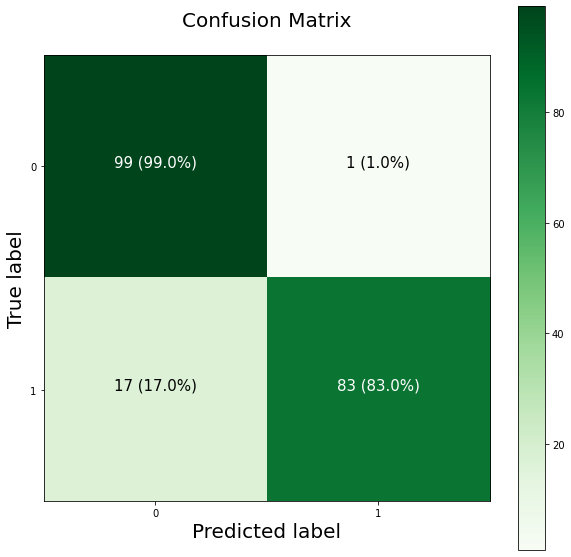

In [ ]:
plot_confusion_matrix(y_test, y_preds)

on own end

# Working with a larger example (Multiclass classification)

When we have more than two classes as an option, it's known as multiclass classification

To practice multi class classification, we're going to build a neural network for classification on fashion MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been alredy split into training and testing sets for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training smple
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

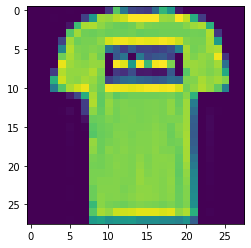

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [ ]:
print(train_labels[1])

0


In [ ]:
# The labels have a matching label for each no : https://github.com/zalandoresearch/fashion-mnist

class_names = ["T-shirt/top", "Trouser", "Pullover",
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

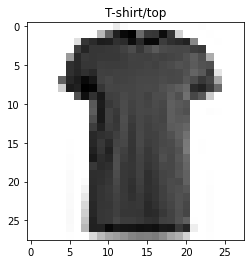

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

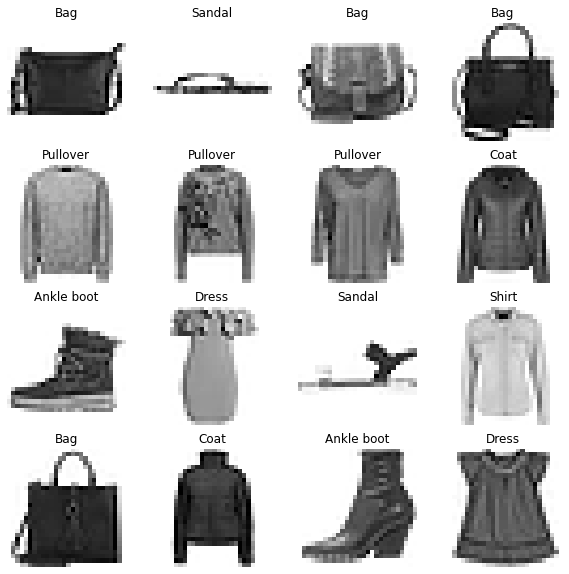

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False) ## Do not need tics

### Building a multi-class classification model

For our multi-class classification  model, we can use a similar architecture to binary classification. We mat ha e to tweak some things
* Input shape = 28 X 28 (shape of 1 image)
* Output shape = 10 (1 per class of clothing)
* Loss function = tf.keras.losses.CategorialCrossentropy()
* Output layer activation = softmax (not sigmoid)

In [ ]:
# Our data needs to be flattened (from (28,28) to (none, 784))
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)


# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # We use Categorical Cross Entropy when the output labels are one hot encoded
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_hist = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)


# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # We use Categorical Cross Entropy when the output labels are one hot encoded
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_hist = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_138 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_139 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

The Neural networks prefer the data to be normalized (or scaled). That is, the neural networks prefer the tensors, they find the patterns in to have numbers in the range of 0 and 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the sacled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Replicating the above model, by just replacing training data with the normal data

# Set random seed
tf.random.set_seed(42)

# Create a model (mode 11 replicated)
model_12 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

If we see now, just by normalization, the val_accuracy has shot up to 80% from 35%.
Neural networks prefer normalized data

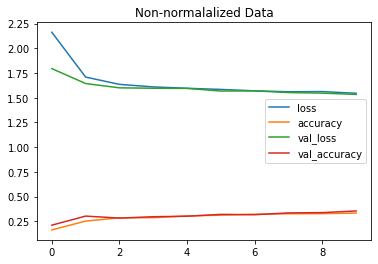

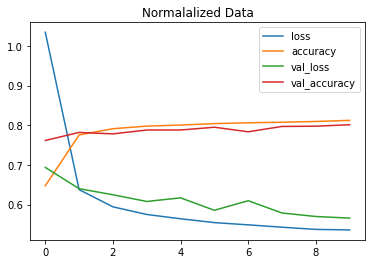

In [ ]:
import pandas as pd
# Plot non normalized data loss curve
pd.DataFrame(non_norm_hist.history).plot(title="Non-normalalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalalized Data")

The same model even with ***slightly different data*** can give ***drammatically*** different dataset. So it is very important that we compare them on criteria (eg. same architecture different data or different architecture and same data or so on and so forth..)

In [ ]:
### Finding the ideal learning rate 

# Set the random seed
tf.random.set_seed(42)

#Create the model
model_13 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)


# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the modekl
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

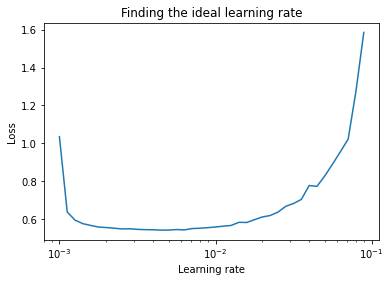

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt


lrs = 1e-3 * 10**(tf.range(40)/20)

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

on own

In [ ]:
# Finding the learning rate causing least loss
lrs[find_lr_history.history["loss"].index(np.array(find_lr_history.history["loss"]).min())].numpy()

0.004466835921509632

On own end

In [ ]:
# Let's fit the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lets take it as 0.01
                 metrics=['accuracy'])

# Fit the model
model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multiclass classification model


We could:
* Evaluate it's performance using other classification metrics (such as confusion matrix)
* Assess some its predictions (using visualizations)
* Improve results (by training for longer or changing the architecture)
* Saving and exporting it for later use

In [ ]:
# Create a confusion matrix



# https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/metrics/_plot/confusion_matrix.py#L168
from sklearn.metrics import confusion_matrix
import itertools

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    # Create classes
    # classes = False

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our models

y_probs = model_14.predict(test_data_norm)  ## prediction probability

# View the first 5 predictions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

Remember to make predictions on the same kind of data as it was trained on. eg if it was trained on normalized data, predict on normalized data only

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all prediction probabilities into integers

y_preds = y_probs.argmax(axis=1)

# view the first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

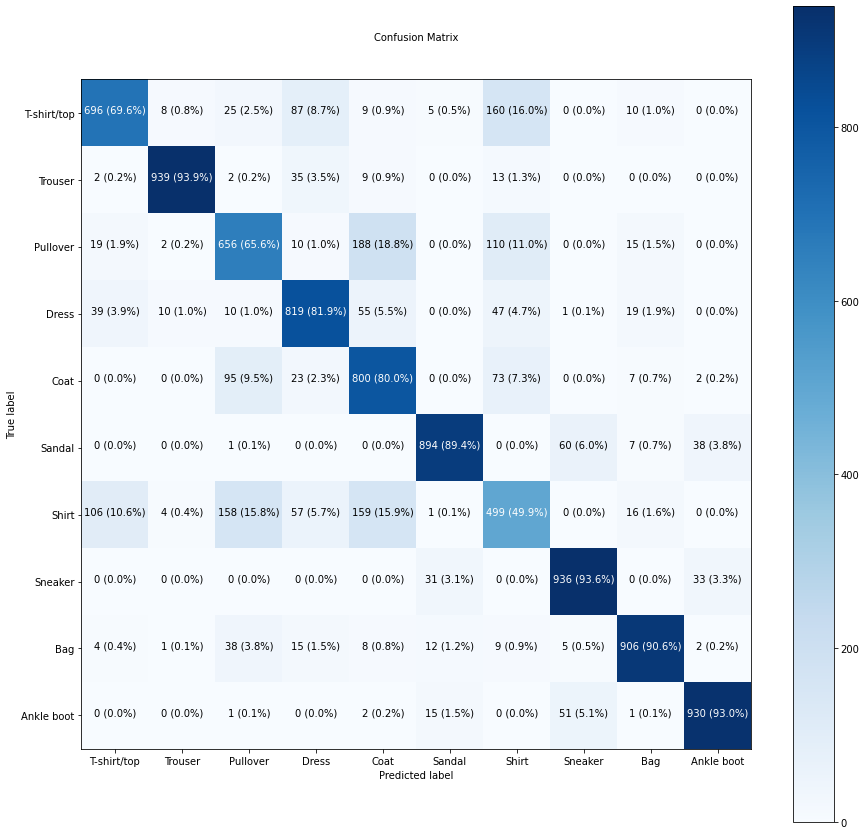

In [ ]:
# Make a prettier confusion matrix 
make_confusion_matrix(test_labels, 
                      y_preds,
                      class_names,
                      (15,15),
                      10)

Note: Often working with images, its always better to visualize as much as possible


Create a function
* Plot a random image
* Make prediction for the image
* Lable it with the truth label and predicted label

In [ ]:
import random

def plot_random_image(model, images, truth_labels, classes):
    # Set a random image
    i = random.randint(0, len(images))

    # Create prediction and target
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[truth_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add x lables information (predictions/ true labels)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # Set green or red depending on prediction being right or wrong

In [ ]:
plot_random_image(model_14, 
                  test_data_norm, ## Always make predictions on the same tupe of data set as it was trained on
                  test_labels, 
                  class_names)

### What pattern is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [ ]:
# Now let's check out the bias vector

biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

In [ ]:
model_14.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_147 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_148 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Every neuron has a bias vector in addition to a weights matrix

The bias vector is initialized with 0's (atleast in the case of a TensorFlow dense layer)

The bias dictates how much the patterns within the corresponding weights matrix must influence the next layer

In [ ]:
# Let's check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)